# 📞 Customer Care Interaction Analysis

Welcome to this project where we explore customer care interaction data with the goal of uncovering **valuable business insights**. This analysis helps stakeholders identify patterns, inefficiencies, and opportunities to improve service operations.

---

## 🧩 Dataset Overview

This dataset contains customer care interaction records with the following columns:

- **date** – Date of contact
- **time** – Time of contact
- **phone** – Customer's phone number (anonymized)
- **car_registration** – Vehicle identifier
- **reason** – Stated reason for contacting customer care
- **response** – How the issue was handled or resolved
- **location** – Store or outlet involved in the interaction

---

## 🎯 Project Objectives

- ⏰ Identify peak contact times and busiest days of the week
- ❓ Analyze the most common reasons customers seek help
- 📝 Evaluate how customer care responses vary
- 🔁 Detect recurring contacts (repeat customers or vehicles)
- 🗺️ Compare customer care volume and issues by location

---

## 🛠️ Tools & Techniques

- Python (Pandas, NumPy, Seaborn, Matplotlib)
- Data cleaning & preprocessing
- Feature engineering (e.g. time-of-day, weekday/weekend)
- Grouping, aggregation, and visual analysis
- Insight summarization for business impact

---

> 📌 This project is part of my **Data Science portfolio** to demonstrate real-world data wrangling, EDA, and insight communication skills.



In [1]:
# 📦 Core libraries
import os
import numpy as np
import pandas as pd

# 📊 Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 🧼 Data preprocessing
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

# 📈 Optional: For analysis and modeling (if needed)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 📍 Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [2]:
# Step 1: Load the data
calldata = pd.read_excel("CustomerTollFreeData.xlsx")
calldata.head()


,DATE,TIME,NAME,PHONE,CAR REG,TYPE,REASON FOR CALL,LOCATION/OUTLET,RESPONSE GIVEN/CONCLUSION
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-04-01,12.50pm,NaN,705157296,NaN,NaN,Inquiry on directions,Two Rivers,Advised
2,NaT,4.42pm,NaN,722823562,NaN,NaN,Inquiry on oil removal,Garden City,Advised
3,NaT,7.00pm,NaN,115270492,NaN,NaN,Client wanted to pick key,Mountain View,Advised
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### View Missing Values and Data Types

### Fill Down Missing Dates Using Forward Fill

In [3]:
# Fill missing DATE values with the previous non-null value (forward fill)
calldata['DATE'] = calldata['DATE'].fillna(method='ffill')
calldata


C:\Users\hp\AppData\Local\Temp\ipykernel_13488\1764606984.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  calldata['DATE'] = calldata['DATE'].fillna(method='ffill')


,DATE,TIME,NAME,PHONE,CAR REG,TYPE,REASON FOR CALL,LOCATION/OUTLET,RESPONSE GIVEN/CONCLUSION
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-04-01,12.50pm,NaN,705157296,NaN,NaN,Inquiry on directions,Two Rivers,Advised
2,2022-04-01,4.42pm,NaN,722823562,NaN,NaN,Inquiry on oil removal,Garden City,Advised
3,2022-04-01,7.00pm,NaN,115270492,NaN,NaN,Client wanted to pick key,Mountain View,Advised
4,2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2117,2022-09-29,11.07am,NaN,708408310,NaN,NaN,Inquiry on leather restoration,Galleria,Advised
2118,2022-09-29,2.35pm,NaN,712327061,NaN,NaN,Inquiry if carwash is open,Southfield,Advised
2119,2022-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2120,2022-09-30,11.19am,NaN,723455519,NaN,NaN,Inquiry if we sell machines,HQ,Advised-sent Brian's no.


### 🧹 Data Cleaning: Handling Missing Values

To prepare the customer care dataset for analysis, we performed the following steps:

- **Dropped columns with excessive missing data (>90%)**: Removed `NAME`, `TYPE`, and `CAR REG` as they contain little useful information.
- **Removed rows with missing `TIME` values**: These are  invalid records.
- **Forward-filled missing `DATE` values**: Propagated previous valid dates to fill gaps, then dropped any remaining row with a missing date, the first row.
- **Filled missing values in other key columns** using appropriate placeholder values:
  - `LOCATION/OUTLET` → `"Unknown Location"`
  - `PHONE ` → `"Missing Phone"`
  - `RESPONSE GIVEN/CONCLUSION` → `"Not Recorded"`
  - `REASON FOR CALL` → `"Unknown Reason"`
- **Generated a summary table** to confirm that all critical columns are now complete and ready for further analysis.


In [4]:
# Drop columns with excessive missing values (>90%)
cols_to_drop = ["NAME", "TYPE", "CAR REG"]
calldata.drop(columns=cols_to_drop, inplace=True)

# Drop rows where TIME is missing (means record does not exist)
calldata = calldata[calldata["TIME"].notna()]

# Forward-fill missing DATEs (fill down from above)
calldata["DATE"] = calldata["DATE"].fillna(method="ffill")

# Drop any remaining row with missing DATE (likely first row)
calldata = calldata[calldata["DATE"].notna()]

# Fill missing values in other key columns with placeholders
calldata = calldata.fillna({
    "LOCATION/OUTLET": "Unknown Location",
    "PHONE ": "Missing Phone",
    "RESPONSE GIVEN/CONCLUSION": "Not Recorded",
    "REASON FOR CALL": "Unknown Reason"
})

# Optional: Confirm no missing values remain
missing_summary = pd.DataFrame({
    "Missing Values": calldata.isnull().sum(),
    "Percent_Missing": (calldata.isnull().sum() / len(calldata)) * 100,
    "Data_Type": calldata.dtypes
}).sort_values(by="Percent_Missing", ascending=False)

print("✅ Final Missing Value Summary:")
display(missing_summary)


✅ Final Missing Value Summary:


C:\Users\hp\AppData\Local\Temp\ipykernel_13488\1770274037.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  calldata["DATE"] = calldata["DATE"].fillna(method="ffill")
C:\Users\hp\AppData\Local\Temp\ipykernel_13488\1770274037.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calldata["DATE"] = calldata["DATE"].fillna(method="ffill")


,Missing Values,Percent_Missing,Data_Type
DATE,0,0.0,datetime64[ns]
TIME,0,0.0,object
PHONE,0,0.0,object
REASON FOR CALL,0,0.0,object
LOCATION/OUTLET,0,0.0,object
RESPONSE GIVEN/CONCLUSION,0,0.0,object


### 🧹 Standardizing Values in `LOCATION/OUTLET`

To ensure consistency in our analysis, we replaced the value `"All"` with `"Any"` in the `LOCATION/OUTLET` column. This standardization helps eliminate ambiguity in location labeling and improves the clarity of grouped insights later in the project.


In [5]:
# Replace all variations of 'All' (case-insensitive, trim spaces) with 'Any'
calldata["LOCATION/OUTLET"] = calldata["LOCATION/OUTLET"].str.strip().replace(r"(?i)^all$", "Any", regex=True)

In [6]:
# Save cleaned data to CSV
calldata.to_csv("cleaned_customer_data.csv", index=False)


 ### Review Data Types

In [7]:
# Check data types
calldata.dtypes


DATE                         datetime64[ns]
TIME                                 object
PHONE                                object
REASON FOR CALL                      object
LOCATION/OUTLET                      object
RESPONSE GIVEN/CONCLUSION            object
dtype: object

### Feature Engineering from DATE and TIME

###  Standardizing the DATE Column
To ensure consistent analysis and plotting, we convert the `DATE` column to `datetime` format and extract only the date portion, removing any embedded time component.

- This ensures all records are aligned to proper calendar dates.
- It allows for easy grouping, filtering, and time-series analysis.

```python
calldata["DATE"] = pd.to_datetime(calldata["DATE"], errors="coerce").dt.date


In [8]:
import pandas as pd

# Load the cleaned customer care data
calldata = pd.read_csv("cleaned_customer_data.csv")

# =========================
# 1. Convert DATE to datetime.date
# =========================
# Explanation:
# Convert the DATE column (currently object type) to datetime format first,
# then extract just the date part (removes any potential time portion)
calldata["DATE"] = pd.to_datetime(calldata["DATE"], errors="coerce").dt.date

# =========================
# 2. Clean TIME strings and convert to datetime.time
# =========================
# Explanation:
# - Replace '.' with ':' for proper time formatting (e.g., 12.50pm → 12:50pm)
# - Add space before 'am' or 'pm' if missing
# - Use pd.to_datetime with format '%I:%M %p' to parse time

# Clean TIME column
calldata["TIME"] = calldata["TIME"].astype(str)  # Ensure it's string for replacement
calldata["TIME"] = calldata["TIME"].str.replace(".", ":", regex=False)  # Replace dot with colon
calldata["TIME"] = calldata["TIME"].str.replace(r"(?i)(am|pm)", r" \1", regex=True).str.strip()  # Add space before am/pm

# Convert to datetime.time format
calldata["TIME"] = pd.to_datetime(calldata["TIME"], format="%I:%M %p", errors="coerce").dt.time




### Impute Missing TIME Values

In [9]:
from datetime import timedelta

# Sort data by DATE and TIME to maintain chronological order
calldata = calldata.sort_values(by=["DATE", "TIME"]).reset_index(drop=True)

# Loop through the TIME column to fill NaT with +30 mins after the previous valid time
for i in range(1, len(calldata)):
    if pd.isna(calldata.loc[i, "TIME"]):
        prev_time = calldata.loc[i - 1, "TIME"]
        
        # Only fill if previous time is not missing
        if not pd.isna(prev_time):
            # Add 30 minutes to previous time
            new_time = (datetime.combine(datetime.today(), prev_time) + timedelta(minutes=30)).time()
            calldata.loc[i, "TIME"] = new_time

# Check if all missing values are filled
print("Remaining missing TIME entries:", calldata["TIME"].isna().sum())


Remaining missing TIME entries: 0


In the dataset, some records are missing time values. Instead of dropping them, we use a smart imputation strategy to maintain temporal consistency:

✅ Strategy:
Sort by DATE and TIME to ensure chronological order.

For each missing TIME value, add 30 minutes to the previous valid time.

This preserves a realistic and spaced timeline of customer calls.

### 🕒 Feature Engineering: Time-Based Insights

We derive several **time-based features** from the cleaned `DATE` and `TIME` columns to better understand customer behavior patterns and service trends:

- **`hour`**: Extracted from the `TIME` column to analyze peak and off-peak calling hours.
- **`day_of_week`**: Derived from the `DATE` column to identify patterns across weekdays and weekends.
- **`day`**: Day of the month, useful for identifying date-specific spikes or trends.
- **`month`**: Useful to check for seasonality in complaints or service issues.
- **`call_period`**: A custom feature categorizing calls into:
  - **Morning** (5 AM – 11:59 AM)
  - **Afternoon** (12 PM – 4:59 PM)
  - **Evening** (5 PM – 8:59 PM)
  - **Night** (9 PM – 4:59 AM)

These engineered features will allow for rich temporal analysis such as:
- When are customers most likely to call?
- Are there specific times or days when certain issues spike?
- Does call volume drop or rise on weekends or holidays?


In [10]:
# =========================
# 3. Feature Engineering - Time Based
# =========================
# Explanation:
# From the cleaned TIME and DATE columns, we extract key time-based features:
# - hour: to analyze call patterns by hour of day
# - day_of_week: to observe weekly trends
# - day: day of the month (1-31)
# - month: to see if complaints are seasonal
# - call_period: Morning/Afternoon/Evening/Night based on hour

# Extract hour from TIME
calldata['hour'] = calldata['TIME'].apply(lambda t: t.hour if pd.notnull(t) else None)

# Day of the week (e.g., Monday)
calldata['day_of_week'] = pd.to_datetime(calldata['DATE']).dt.day_name()

# Day of the month
calldata['day'] = pd.to_datetime(calldata['DATE']).dt.day

# Month name
calldata['month'] = pd.to_datetime(calldata['DATE']).dt.month_name()

# Custom period of day based on hour
def get_call_period(hour):
    if pd.isnull(hour):
        return "Unknown"
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

calldata['call_period'] = calldata['hour'].apply(get_call_period)
calldata


,DATE,TIME,PHONE,REASON FOR CALL,LOCATION/OUTLET,RESPONSE GIVEN/CONCLUSION,hour,day_of_week,day,month,call_period
0,2021-11-08,17:00:00,724230732,Missing Mats,GARDEN CITY,"Mats returned, to be picked",17,Monday,8,November,Evening
1,2021-11-09,13:00:00,708326449,Wanted to confirm whether they left Sunglasses...,GARDEN CITY,Not available in store,13,Tuesday,9,November,Afternoon
2,2021-11-09,14:00:00,Missing Phone,Inquiry on availability of job for his son,GARDEN CITY,Gave him the customer care email,14,Tuesday,9,November,Afternoon
3,2021-11-10,17:09:00,718744485,Inquiry for Closing time in Two Rivers Outlet,TWO RIVERS,Communicated 7pm as advised by supervisor,17,Wednesday,10,November,Evening
4,2021-11-10,17:50:00,731114532,Complained of lost perfume (Versace Eros),GARDEN CITY,CCTV shows no evidence of item being picked,17,Wednesday,10,November,Evening
...,...,...,...,...,...,...,...,...,...,...,...
1522,2023-08-12,14:10:00,710596654,Inquiry on packages,Garden City,Advised,14,Saturday,12,August,Afternoon
1523,2023-08-12,14:40:00,799437046,Inquiry on steam engine wash,Garden City,Advised,14,Saturday,12,August,Afternoon
1524,2023-08-14,13:58:00,710926966,Client requested laptop from the car,The Hub,Assisted,13,Monday,14,August,Afternoon
1525,2023-08-16,12:46:00,758697800,Inquiry on buffing/Headlight,Garden City,Advised,12,Wednesday,16,August,Afternoon


### Time-Based Visualizations Plan
Calls by Hour of Day
→ Shows peak call times throughout the day.

Calls by Day of the Week
→ Reveals which weekdays are busier.

Calls by Month
→ Highlights seasonal or monthly trends.

Calls by Time Period (Morning, Afternoon, Evening, Night)
→ Gives a more intuitive overview of call timin

C:\Users\hp\AppData\Local\Temp\ipykernel_13488\3995207470.py:19: UserWarning: The palette list has more values (24) than needed (22), which may not be intended.
  sns.countplot(x="hour", data=calldata, ax=axes[0, 0], hue="hour", palette=green_palette_large, legend=False)
C:\Users\hp\AppData\Local\Temp\ipykernel_13488\3995207470.py:26: UserWarning: The palette list has more values (24) than needed (7), which may not be intended.
  sns.countplot(x="day_of_week", data=calldata, order=day_order, hue="day_of_week", palette=green_palette_large, ax=axes[0, 1], legend=False)
C:\Users\hp\AppData\Local\Temp\ipykernel_13488\3995207470.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_data.index, y=month_data.values, palette=green_palette_large[:len(month_data)], ax=axes[1, 0])
C:\Users\hp\AppData\Local\Temp\ipykernel_13488\3995207470.py:

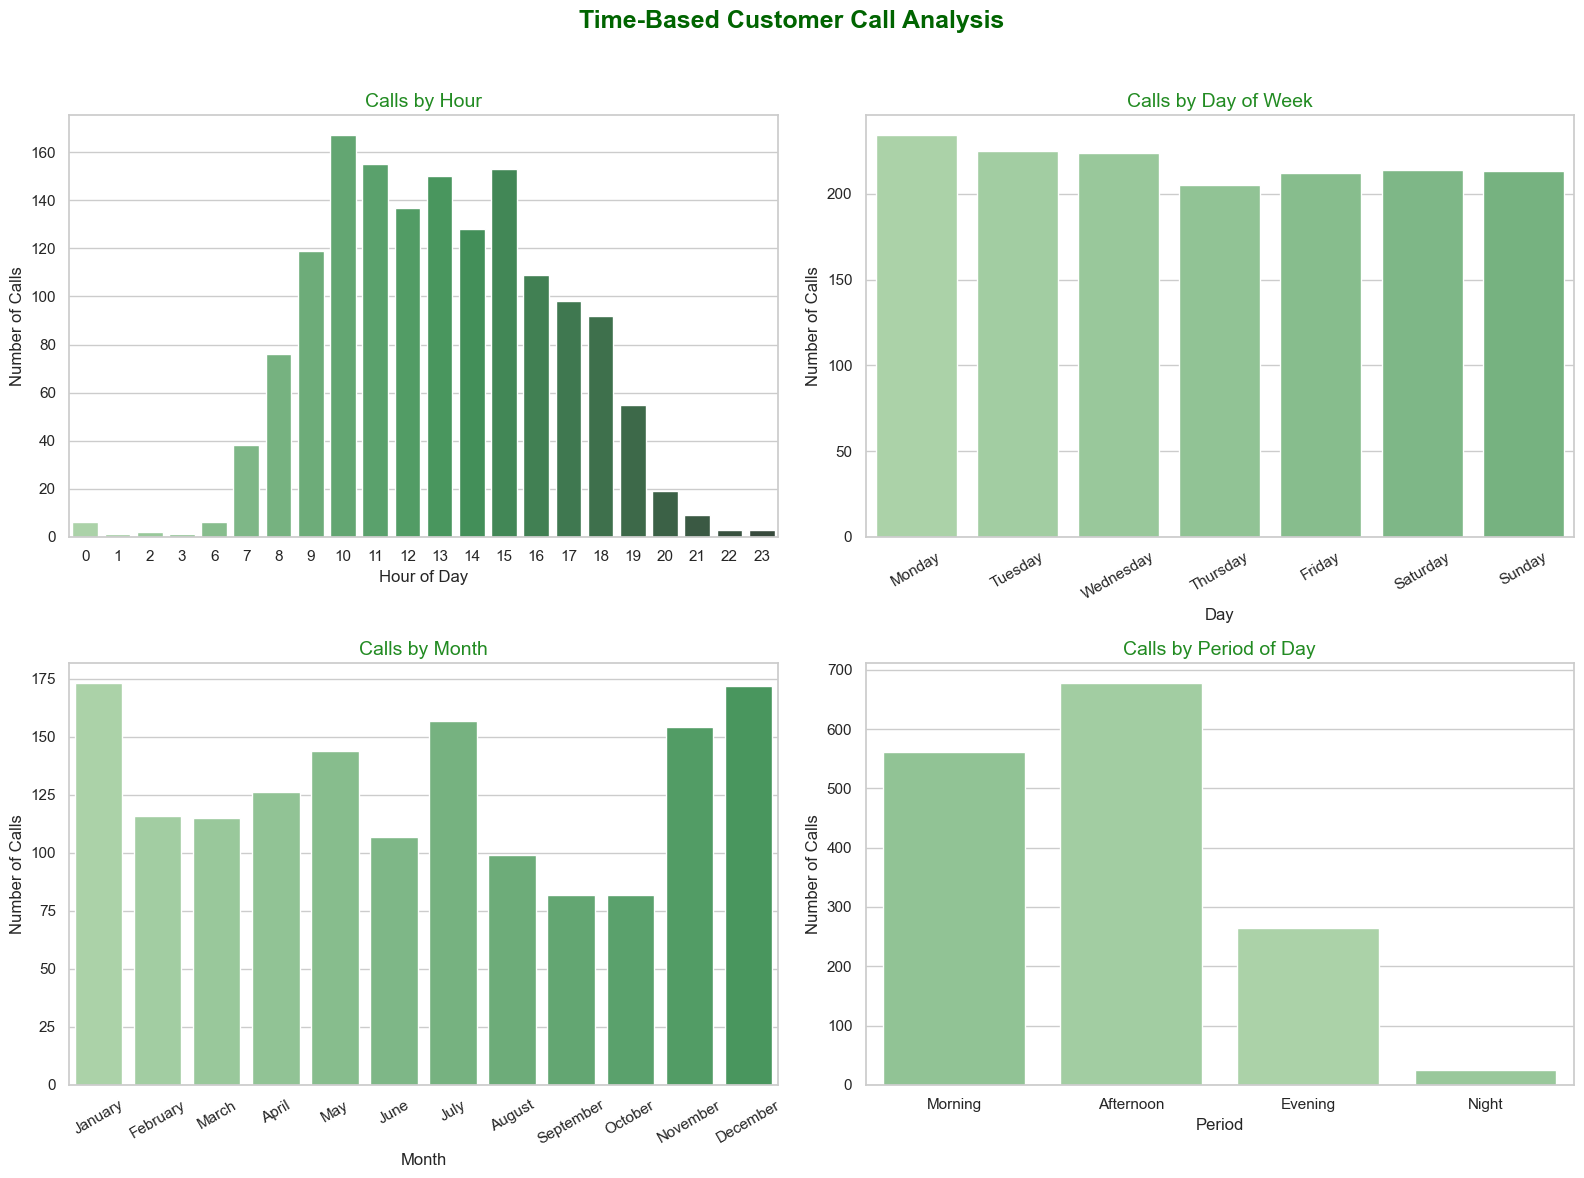

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set Seaborn style
sns.set(style="whitegrid")

# Create Output folder if it doesn't exist
os.makedirs("Output", exist_ok=True)

# Create larger green palette to avoid cycling issues
green_palette_large = sns.color_palette("Greens_d", n_colors=24)

# Set up figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Time-Based Customer Call Analysis", fontsize=18, fontweight="bold", color="darkgreen")

# 1. Call volume by hour
sns.countplot(x="hour", data=calldata, ax=axes[0, 0], hue="hour", palette=green_palette_large, legend=False)
axes[0, 0].set_title("Calls by Hour", fontsize=14, color="forestgreen")
axes[0, 0].set_xlabel("Hour of Day")
axes[0, 0].set_ylabel("Number of Calls")

# 2. Call volume by day of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x="day_of_week", data=calldata, order=day_order, hue="day_of_week", palette=green_palette_large, ax=axes[0, 1], legend=False)
axes[0, 1].set_title("Calls by Day of Week", fontsize=14, color="forestgreen")
axes[0, 1].set_xlabel("Day")
axes[0, 1].set_ylabel("Number of Calls")
axes[0, 1].tick_params(axis='x', rotation=30)

# 3. Call volume by month
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
month_data = calldata["month"].value_counts().reindex(month_order).dropna()
sns.barplot(x=month_data.index, y=month_data.values, palette=green_palette_large[:len(month_data)], ax=axes[1, 0])
axes[1, 0].set_title("Calls by Month", fontsize=14, color="forestgreen")
axes[1, 0].set_xlabel("Month")
axes[1, 0].set_ylabel("Number of Calls")
axes[1, 0].tick_params(axis='x', rotation=30)

# 4. Call period (morning/afternoon/etc)
period_order = ["Morning", "Afternoon", "Evening", "Night"]
sns.countplot(x="call_period", data=calldata, order=period_order, hue="call_period", palette=green_palette_large, ax=axes[1, 1], legend=False)
axes[1, 1].set_title("Calls by Period of Day", fontsize=14, color="forestgreen")
axes[1, 1].set_xlabel("Period")
axes[1, 1].set_ylabel("Number of Calls")

# Final touches
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("Output/time_based_call_analysis.png", dpi=300)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_13488\1998817729.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\hp\AppData\Local\Temp\ipykernel_13488\1998817729.py:17: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
C:\Users\hp\AppData\Local\Temp\ipykernel_13488\1998817729.py:31: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(
C:\Users\hp\AppData\Local\Temp\ipykernel_13488\1998817729.py:43: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\hp\AppData\Local\Temp\ipykernel_13488\1998817729.py:44: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.
  plt.savefig("Output/location_bas

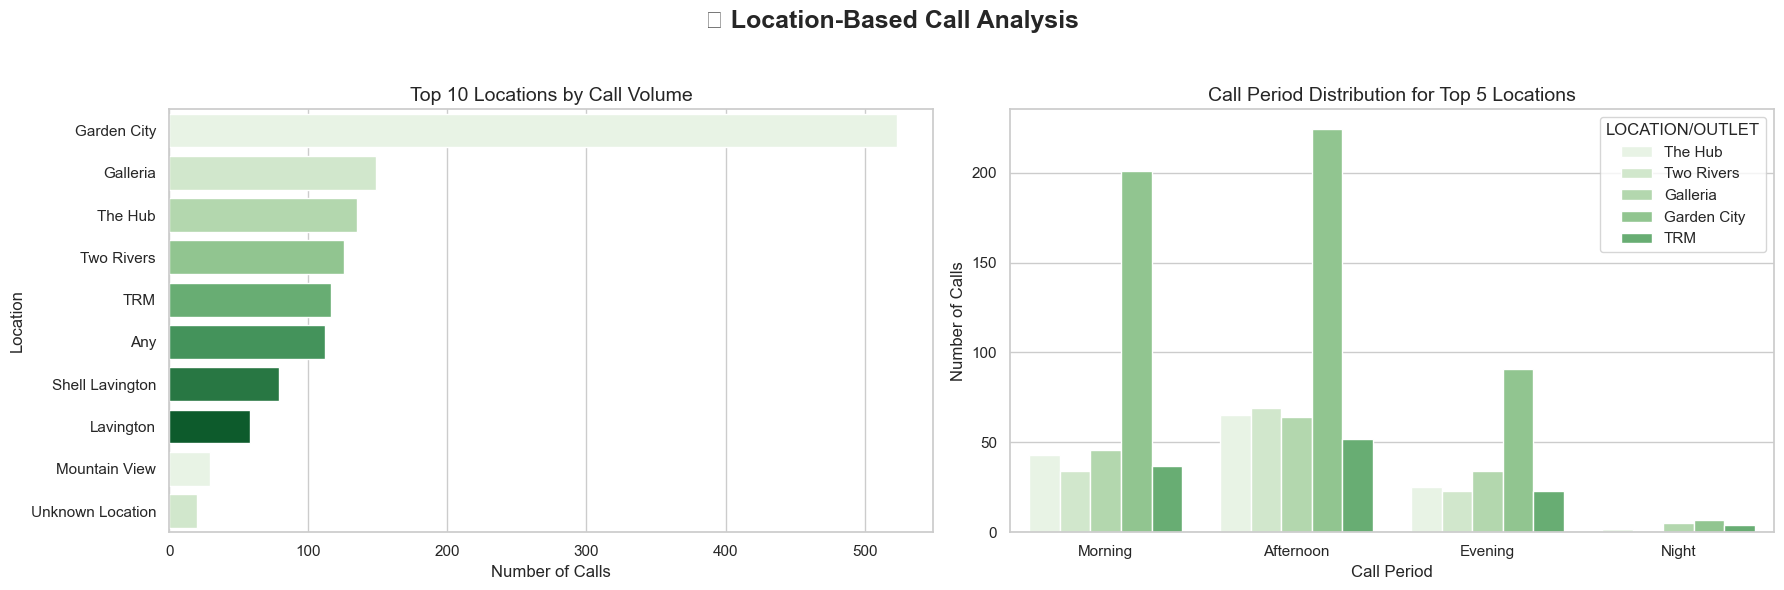

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create a green color palette
green_palette = sns.color_palette("Greens", as_cmap=False, n_colors=8)

# Figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle("📍 Location-Based Call Analysis", fontsize=18, fontweight='bold')

# Top Locations by number of calls
top_locations = calldata['LOCATION/OUTLET'].value_counts().head(10)

sns.barplot(
    x=top_locations.values,
    y=top_locations.index,
    palette=green_palette,
    ax=axes[0]
)
axes[0].set_title("Top 10 Locations by Call Volume", fontsize=14)
axes[0].set_xlabel("Number of Calls")
axes[0].set_ylabel("Location")

# Calls by time of day per location (top 5 locations only)
top5_locs = calldata['LOCATION/OUTLET'].value_counts().head(5).index
filtered_data = calldata[calldata['LOCATION/OUTLET'].isin(top5_locs)]

sns.countplot(
    data=filtered_data,
    x='call_period',
    hue='LOCATION/OUTLET',
    order=['Morning', 'Afternoon', 'Evening', 'Night'],
    palette=green_palette,
    ax=axes[1]
)
axes[1].set_title("Call Period Distribution for Top 5 Locations", fontsize=14)
axes[1].set_xlabel("Call Period")
axes[1].set_ylabel("Number of Calls")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Output/location_based_analysis.png", dpi=300)
plt.show()


High-volume regions may require extra staffing or service optimization.

Time-of-day trends can inform shift scheduling or targeted responses.

Call clustering in certain areas may indicate product/service issues.

## 📍 Location-Based Call Analysis

### 🔹 Top 10 Locations by Call Volume

This bar chart highlights the locations from which the most customer care calls originated.

**Key Insights:**
- **Garden City** has the **highest call volume**, suggesting it may require additional support or resources.
- Other high-call locations include **Galleria**, **The Hub**, **Two Rivers**, and **TRM**.
- Entries such as **“Unknown Location”** and **“Any”** likely represent missing or generalized data — these should be cleaned or categorized more clearly for future analysis.

---

### 🕒 Call Period Distribution for Top 5 Locations

This visualization breaks down call activity across different times of day — Morning, Afternoon, Evening, and Night — for the five most active locations.

**Key Insights:**
- **Afternoon** and **Evening** are the busiest periods for most top locations, especially **Garden City**, **TRM**, and **Galleria**.
- **Night-time calls are minimal**, which may reflect operational hours or low late-night customer demand.
- These patterns can be used to guide **staffing schedules** and **resource allocation** throughout the day.

---

### ✅ Business Takeaways
- 📌 **Operational Strategy**: Focus on high-volume locations like **Garden City** and **Galleria** to reduce congestion and improve service quality.
- 👥 **Workforce Planning**: Schedule more agents during **afternoon peak hours** to handle higher call loads efficiently.
- 🧹 **Data Hygiene**: Clean ambiguous entries like **"Any"** and **"Unknown"** to improve data accuracy and the reliability of insights.


## 📝 Reason-Based Call Analysis

### 🔹 Top 15 Reasons for Customer Calls

This horizontal bar chart displays the **15 most common reasons** why customers contacted support.

**Key Insights:**
- **"CALL FOR SERVICE"** is by far the most frequent reason, indicating that customers often seek service assistance rather than making complaints or inquiries.
- Other common reasons include:
  - **"INQUIRY"**
  - **"CALL TO FIND OUT IF CAR IS READY"**
  - **"FOLLOW UP"**
- The variety of reasons reflects a **wide range of customer needs**, from basic inquiries to vehicle service tracking.

---

### 🕒 Most Common Reason by Call Period

This chart shows the **most common reason for calling**, segmented by time of day (Morning, Afternoon, Evening, Night).

**Key Insights:**
- **Afternoon and morning** hours consistently show higher call activity for **"CALL FOR SERVICE"** and **"INQUIRY"**.
- The **"FOLLOW UP"** reason is more spread out across the day, reflecting ongoing communication loops.
- **Night** time has the lowest call volumes, and the reasons are mostly for **urgent service needs or clarifications**.

---

### ✅ Business Takeaways
- 📞 **Service Demand**: Prioritize rapid response for **service-related calls**, especially during **morning and afternoon hours**.
- 📊 **Categorization Refinement**: Consider merging similar categories (e.g., "INQUIRY", "GENERAL INQUIRY") to simplify analysis and improve clarity.
- ⏱️ **Customer Journey Mapping**: Use the common reasons and their time distribution to **map typical customer support journeys**, allowing for **proactive engagement** in future.


C:\Users\hp\AppData\Local\Temp\ipykernel_13488\1627497645.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_responses.values, y=top_responses.index, palette=green_palette)
C:\Users\hp\AppData\Local\Temp\ipykernel_13488\1627497645.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


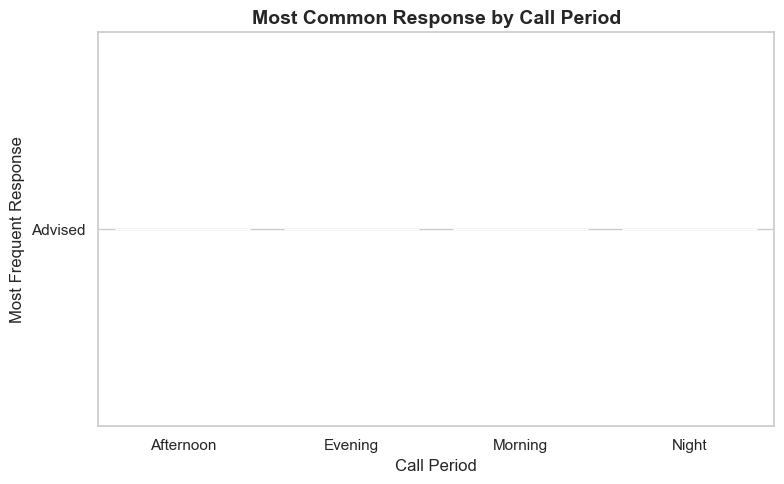

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Create Output folder if it doesn't exist
import os
os.makedirs("Output", exist_ok=True)

# Set green-themed palette
green_palette = sns.color_palette("Greens_r", 15)

# Top 15 most frequent responses
top_responses = calldata["RESPONSE GIVEN/CONCLUSION"].value_counts().nlargest(15)

# Plot top 15 responses
plt.figure(figsize=(12, 6))
sns.barplot(x=top_responses.values, y=top_responses.index, palette=green_palette)
plt.title("Top 15 Most Common Responses", fontsize=14, weight="bold")
plt.xlabel("Number of Calls")
plt.ylabel("Response")
plt.tight_layout()
plt.savefig("Output/top_15_responses.png")
plt.close()

# Most common response by call_period
most_common_response_by_period = (
    calldata.groupby("call_period")["RESPONSE GIVEN/CONCLUSION"]
    .agg(lambda x: Counter(x).most_common(1)[0][0])
    .reset_index()
    .rename(columns={"RESPONSE GIVEN/CONCLUSION": "Most_Common_Response"})
)

# Plot the most common response by period
plt.figure(figsize=(8, 5))
sns.barplot(
    data=most_common_response_by_period,
    x="call_period",
    y="Most_Common_Response",
    palette="Greens"
)
plt.title("Most Common Response by Call Period", fontsize=14, weight="bold")
plt.xlabel("Call Period")
plt.ylabel("Most Frequent Response")
plt.tight_layout()
plt.savefig("Output/common_response_by_period.png")



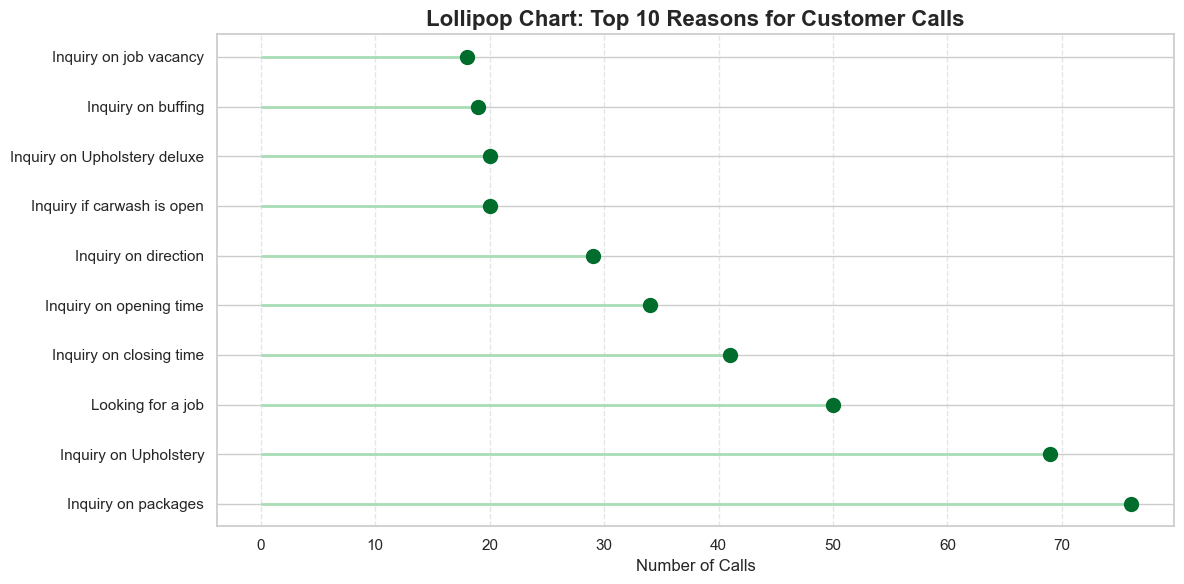

In [14]:
import os
import matplotlib.pyplot as plt

# Create output folder if it doesn't exist
os.makedirs("Output", exist_ok=True)

# Ensure top_reasons is a proper Series with both index and values
top_reasons = calldata['REASON FOR CALL'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.hlines(y=top_reasons.index.tolist(), xmin=0, xmax=top_reasons.values, color='#a8ddb5', linewidth=2)
plt.plot(top_reasons.values, top_reasons.index.tolist(), "o", color='#006d2c', markersize=10)

# Style
plt.title('Lollipop Chart: Top 10 Reasons for Customer Calls', fontsize=16, weight='bold')
plt.xlabel('Number of Calls')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save in HD
plt.savefig("Output/lollipop_top_reasons_green.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


In [15]:
!pip install plotly


In [16]:
import pandas as pd
import plotly.express as px
import os

# Ensure Output folder exists
os.makedirs("Output", exist_ok=True)

# Step 1: Count all REASON → RESPONSE pairs
combo_counts = calldata.groupby(['REASON FOR CALL', 'RESPONSE GIVEN/CONCLUSION']) \
                       .size().reset_index(name='count')

# Step 2: Keep only Top 5 Reasons
top_reasons = combo_counts.groupby('REASON FOR CALL')['count'].sum().nlargest(5).index
filtered = combo_counts[combo_counts['REASON FOR CALL'].isin(top_reasons)]

# Step 3: For each Reason, keep Top 3 Responses
filtered = (
    filtered.groupby('REASON FOR CALL', group_keys=False)
    .apply(lambda x: x.nlargest(3, 'count'))
    .reset_index(drop=True)
)

# Step 4: Build Sunburst Chart
fig = px.sunburst(
    filtered,
    path=['REASON FOR CALL', 'RESPONSE GIVEN/CONCLUSION'],
    values='count',
    color='REASON FOR CALL',
    color_discrete_sequence=px.colors.sequential.Greens,
    title='Simplified Sunburst Chart: Top 5 Reasons → Top 3 Responses'
)

# Show Chart
fig.show()

# ✅ Save chart to Output folder
fig.write_html("Output/simplified_sunburst.html")
print("✅ Saved: Output/simplified_sunburst.html")


C:\Users\hp\AppData\Local\Temp\ipykernel_13488\2720850814.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'count'))


✅ Saved: Output/simplified_sunburst.html
